In [11]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [13]:
# nltk.download_shell()


In [4]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]


In [5]:
for mess_no, message in enumerate(messages[:10]):
    pass

In [6]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [14]:
messages = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['Label','Message'])

In [8]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.info()

In [9]:
df.describe()

NameError: name 'df' is not defined

In [10]:
for mem_no, messages in enumerate(message[:10]):
    print(messages,mem_no)

s 0
p 1
a 2
m 3
	 4
H 5
a 6
d 7
  8
y 9


In [11]:
messages.head()

AttributeError: 'str' object has no attribute 'head'

In [15]:
messages['length'] = messages['Message'].apply(len)

In [16]:
messages.head()

Label                                            Message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

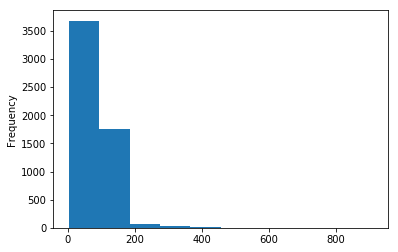

In [17]:
messages['length'].plot.hist()

In [18]:
import string


In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
messa = 'Hello! , I am Kumar Shrestha .?'

In [27]:
no_punc = [c for c in messa if c not in string.punctuation]
no_punc

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'K',
 'u',
 'm',
 'a',
 'r',
 ' ',
 'S',
 'h',
 'r',
 'e',
 's',
 't',
 'h',
 'a',
 ' ']

In [28]:
no_punc= ''.join(no_punc)

In [29]:
no_punc

'Hello  I am Kumar Shrestha '

In [21]:
df = pd.read_csv('nofix_datasets3.csv')

df['Make'] = ''.join(df['Make'])

In [22]:
df['Make'].head()

0                                                   []
1         ['Q3', '35', 'TDI', 'quattro', 'Technology']
2    ['Q3', '35', 'TDI', 'quattro', 'Premium+Sunroof']
3                    ['Q3', '35', 'TDI', 'Technology']
4                      ['Q3', '2.0', 'TDI', 'quattro']
Name: Make, dtype: object

In [23]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
no_punc 


'Hello  I am Kumar Shrestha '

In [25]:
a = no_punc.rstrip()

NameError: name 'no_punc' is not defined

In [26]:
a

NameError: name 'a' is not defined

In [27]:
a.split()

NameError: name 'a' is not defined

In [31]:
from nltk.corpus import stopwords

In [29]:
type(stopwords.words('english'))

list

In [38]:
filter_ = [c for c in no_punc.split() if c.lower() not in stopwords.words('english')]
filter_

['Hello', 'Kumar', 'Shrestha']

In [34]:
filter_ = ''.join(filter_)


In [35]:
filter_

'Hell  I  Kur Shreh '

In [8]:
def text_process(mess):
    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    

In [9]:
text_process(messa)

NameError: name 'messa' is not defined

In [10]:
messages['Message'].apply(text_process).head()

NameError: name 'stopwords' is not defined

In [39]:
m = 'Hello././././, I am Kumar ; ; ' ' ; [] ] ] '

In [40]:
w = [char for char in m if char not in string.punctuation]

In [43]:
w = ''.join(w)
w

'Hello I am Kumar        '

In [44]:
from nltk.corpus import stopwords

In [45]:
me = [word for word in w.split() if word.lower() not in stopwords.words('english')]
me

['Hello', 'Kumar']

In [48]:
messages['Message'].apply(text_process).head()


0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
bow_transfromer = CountVectorizer(messages["Message"])

In [76]:
bow_transformer  = CountVectorizer(analyzer = text_process).fit(messages['Message'])

In [73]:
messages['Message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [71]:
mess4 = messages['Message'][3]

In [84]:
mess4.shape

AttributeError: 'str' object has no attribute 'shape'

In [85]:
bow4 = bow_transformer.transform([mess4])

In [86]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [87]:
bow4.shape

(1, 11425)

In [79]:
bow_transformer.get_feature_names()[9554]

'say'

In [80]:
messages_bow = bow_transformer.transform(messages["Message"])

In [89]:
import sklearn

In [90]:
from sklearn.feature_extraction.text import TfidfTransformer

In [92]:
tfid_Transformer = TfidfTransformer().fit(messages_bow)

In [93]:
tfid4 = tfid_Transformer.transform(bow4)

In [94]:
print(tfid4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [96]:
messagestfid = tfid_Transformer.transform(messages_bow)

In [98]:
print(messagestfid)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

In [99]:
from sklearn.naive_bayes import MultinomialNB

In [100]:
span_detect_model = MultinomialNB().fit(messagestfid,messages['Label'])

In [101]:
all_pred = span_detect_model.predict(messagestfid)

In [102]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [103]:
from sklearn.model_selection import train_test_split

In [105]:
msg_train,msg_test, label_train, label_test = train_test_split(messages['Message'], messages['Label'])

In [106]:
from sklearn.pipeline import Pipeline

In [107]:
 pipeline = Pipeline([
     ('bow',CountVectorizer(analyzer = text_process)),
     ('tfidf',TfidfTransformer()),
     ('classifier', MultinomialNB())
  ])

In [108]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7fe9d9cc5510>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [109]:
predictions = pipeline.predict(msg_test)

In [110]:
from sklearn.metrics import classification_report


In [115]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1199
        spam       1.00      0.70      0.82       194

   micro avg       0.96      0.96      0.96      1393
   macro avg       0.98      0.85      0.90      1393
weighted avg       0.96      0.96      0.95      1393

